# BM 336546 - HW2: Type 1 Diabetes
# Part I: Theoretical Questions

**Q1:** To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. 
     Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim.
        
**Answer:**
Usually the medical dataset is imbalanced and thus accuracy can be a misleading measurment. for example, if we have one patient out of 100 patients that has the condition, and our
algorithm clasiffies all the patients as normal, the accuracy will be 99%. Of course this high accuarcy is irrelavent beacuse we missed the one patient we wanted to detect.
On the other hand, model performance includes measurment such as : F1 score- harmonic average between 𝑆𝑒nsitivity and PPV and measures the tradeoof between those two values
and AUC( area under the curve) - which quantify the separability of the classes.


**Q2:** T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are
going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level 
of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses
all of the features available to you. Explain the pros and cons of each choice. 

**Answer:**
 The first calssifier uses only 2 features, thus it can be visulaized more easily, and we don't need a large amount of examples(patients) to ensure 
 that our model will generalized well. Futhermore, computing time is much shorter when the dimentions are low. On the other hand, for choosing the important      features we need a prior knowledge regarding the condition we want to classify, which is not always existing in the literature. Moreover, another disadvantage of this model is that missing data about patients will affect much more on the learning process. 
 The second classifier uses all the features that available ,it can reflect the reality better than the two features model.However, this model might include irrelavent feature that won't be benificial for classification and can make the computational time much longer. In general, the cons for this type of classifier 
 are the pros of the previous classifier.

**Q3:** A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has
already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies
are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression,linear SVM or nonlinear SVM? Explain your answer.

**Answer:**
 A logistic regression is a less complex model and thus has low running time. Because this model is based on our labling, in this case in which labeling is not so clear, this kind of model is not suitable. While, SVM is a usefull method for image classification. SVM tries to find the best margin and less sensitive to outliars than Logistic Regression. Thus, this kind of model reduces the risk to an error in our data. Linear SVM is preferable because it is less complex and has shorter running time, but in our case it is more likely that the data is not linearly separable. 
So, in such case it probaly would be better to use non-linear SVM.


**Q4:** What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?
 
**Answer:** 
SVM tries to finds the best margin  that separates the classes , while logistic regression does not, instead it can have different decision boundaries with different weights that are near the optimal point. Furthermore,SVM method uses geometrical properties of the data to create the desicion boundary , while loggistic regression method uses statistical methods. In addition, SVM can work with images and not identifed indepndent features, in comparison to Logistic regression. Furtermore, the risk of overfitting is lesser in SVM because we work with more raw data.
The hyperparameter of Logistic regression is lambda(=1/c), and it  controls the penality strength,by determining the importance of weights. On the other hand, the hyperparameter in SVM is C which contorls how soft is the margin of the model. Thus, in Logistic Regression as bigger the lambda(smaller C)-> the modell is less prone to overfitting because more importence is given to the weights. While, in SVM, the smaller C is -> the margin will be softer and we will 
less prone to overfitting. So, in conclusion whereas in SVM the hyperparameter used to affect the loss function, in Logistic regression the hyperparameter affects the weights of the features.


In [1]:
import numpy as np
import pickle
import sys
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
from pathlib import Path
mpl.style.use(['ggplot']) 
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')


from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import hinge_loss

from sklearn.pipeline import Pipeline
%load_ext autoreload

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

from sklearn.metrics import plot_confusion_matrix, roc_auc_score,plot_roc_curve
from sklearn.ensemble import RandomForestClassifier


In [2]:
# First we have changed the all data to numeric (except age) binary values for easier pre-processing. 
# Next, we have fiiled the missing values by values that suits to the specific feature destribution. 
def preprocess(dataset): #change the data to binary - ones and zeros, not including age. 
    dataset.replace('Yes',1,inplace=True)
    dataset.replace('No',0,inplace=True)
    dataset['Gender'].replace('Male',1,inplace=True)
    dataset['Gender'].replace('Female',0,inplace=True)
    dataset['Diagnosis'].replace('Positive',1,inplace=True)
    dataset['Diagnosis'].replace('Negative',0,inplace=True)
    
    dataset.dropna(thresh=15, inplace=True) # if patient misses more than 2 featres-> drop this patient
    for key in dataset : # comlete the missing data by the distribution of the relavent feature
        if(key!='Age'):
            ones=(dataset[key].values == 1).sum()
            zeros=(dataset[key].values == 0).sum()
            nans=dataset[key].size-ones-zeros
            if(nans>0):
                dataset[key].fillna(1,inplace=True, limit=int(math.ceil(((ones/(ones+zeros))*nans))))
                dataset[key].fillna(0,inplace=True, limit=int(math.ceil(((zeros/(ones+zeros))*nans))))
                if(zeros>ones):
                    dataset[key].fillna(0,inplace=True)
                else:
                    dataset[key].fillna(1,inplace=True)   
    
    for i in range(len(dataset['Age'])): # comlete the missing data by the distribution of the relavent feature
                while np.isnan(dataset['Age'].values[i]):
                    dataset['Age'].values[i] =np.random.choice(dataset['Age'])
    return dataset
    
# In purpose to show the data distribution after the split we wanted to represent it by its original values
def original_val(dataset):
    new_dataset=dataset
    new_dataset['Gender'].replace(1,'Male',inplace=True)
    new_dataset['Gender'].replace(0,'Female',inplace=True)
    new_dataset['Diagnosis'].replace(1,'Positive',inplace=True)
    new_dataset['Diagnosis'].replace(0,'Negative',inplace=True)
    new_dataset.replace(1,'Yes',inplace=True)
    new_dataset.replace(0,'No',inplace=True)

    return new_dataset

# In purpose to show the data distribution after the split we wanted to represent it by two age groups : above and under 50.
def age_group(dataset):
    new_dataset=dataset
    new_dataset['Age'].replace(list(range(0,50)),'<50',inplace=True)
    new_dataset['Age'].replace(list(range(50,120)),'>50',inplace=True)
    return new_dataset

# Function that was take out of the 9th tutorial - showing the distrubition in 2-d after applying PCA method.  
def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Negative','Positive'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

#Creating one hot vector
def onehot(df):
    OneHot =[] 
    my_list=[] 
    for index,rows in df.iterrows(): 
        for feature in rows:
            my_list.append(feature) 
        OneHot.append(my_list) 
        my_list=[]    
    return np.array(OneHot)
    
# Taken from the tutorial 
calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

In [3]:
t1d_dataset_pre = pd.read_csv("HW2_data.csv") # load the data


t1d_dataset=preprocess(t1d_dataset_pre) # applying function of pre-processing 
#split train-test
x=t1d_dataset[['Age','Gender','Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness','Increased Hunger','Genital Thrush','Visual Blurring','Itching',
              'Irritability','Delayed Healing','Partial Paresis','Muscle Stiffness','Hair Loss','Obesity','Family History']]
y=t1d_dataset[['Diagnosis']]

X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 10, stratify=y)


# Question 3- visualization and exploration of the data


In [4]:

stats=pd.DataFrame(columns=['Train%','Test%','Delta%'],index=['Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness','Increased Hunger','Genital Thrush','Visual Blurring','Itching',
              'Irritability','Delayed Healing','Partial Paresis','Muscle Stiffness','Hair Loss','Obesity','Family History'])


# for each feature calculating the percentage of difference between tain an split 
for feature in stats.index:
    stats['Train%'][feature]=(((X_train[feature]).sum())/X_train[feature].size)*100
    stats['Test%'][feature]=(((x_test[feature]).sum())/x_test[feature].size)*100
    stats['Delta%'][feature]=stats['Train%'][feature]-stats['Test%'][feature]
       
display(stats) ## represing the distribution of the features as a dataframe table
 
# age is not encoded as binary data so needed specific treat    
stats_age=pd.DataFrame(columns=['Train(average)','Test(average)','Delta'],index=['Age'])
stats_age['Train(average)']['Age']=(((X_train['Age']).sum())/X_train['Age'].size)
stats_age['Test(average)']['Age']=(((x_test['Age']).sum())/x_test['Age'].size)
stats_age['Delta']['Age']=stats_age['Train(average)']['Age']-stats_age['Test(average)']['Age']
display(stats_age)

# specific treat to gender - we are displaying the distrubition of females in the train and test 
stats_gender=pd.DataFrame(columns=['Train(Females%)','Test(Females%)','Delta%'],index=['Gender'])
stats_gender['Train(Females%)']['Gender']=(1-((X_train['Gender']).sum())/X_train['Gender'].size)*100
stats_gender['Test(Females%)']['Gender']=(1-((x_test['Gender']).sum())/x_test['Gender'].size)*100
stats_gender['Delta%']['Gender']=stats_gender['Train(Females%)']['Gender']-stats_gender['Test(Females%)']['Gender']
display(stats_gender) 


,Train%,Test%,Delta%
Increased Urination,48.7751,47.7876,0.987445
Increased Thirst,43.8753,46.0177,-2.14242
Sudden Weight Loss,40.3118,44.2478,-3.93598
Weakness,57.0156,59.292,-2.27645
Increased Hunger,44.7661,43.3628,1.40332
Genital Thrush,20.0445,30.9735,-10.9289
Visual Blurring,45.4343,43.3628,2.07147
Itching,48.1069,49.5575,-1.45062
Irritability,23.608,23.8938,-0.285787
Delayed Healing,46.9933,45.1327,1.86058


,Train(average),Test(average),Delta
Age,48.7639,45.5133,3.25065


,Train(Females%),Test(Females%),Delta%
Gender,37.4165,31.8584,5.55807


**Q3a_1:**  What issues could an imbalance of features between train and test cause?
        
**Answer:**
An imbalance of features between train and test can cause bulding a model that will not predict properley the outcomes of the test set. In such case, the model will learn about the condition among specific characteristics and will not be able to generalize  properely. For instance, if the model training is based on elder age patients , so  when we will try to apply the model on the test set population the model will meet examples that it is not based on.Therfore it might be not relaible. Thus it is important to randomize our features in such a manner that the distibution of train and test would be the same.

**Q3a_2:** How could you solve the issue?

**Answer:**
One simple way to solve this issue is to use stratification, by that we can ensure that the features will be distribioted equally between the train and the test group. By this method we try to neutralize the effect of some feature, each group is divided according to the subgroups and then it is possible
to compare the populations per this feature and to say whether a particular population still has a high risk to develop the condition.


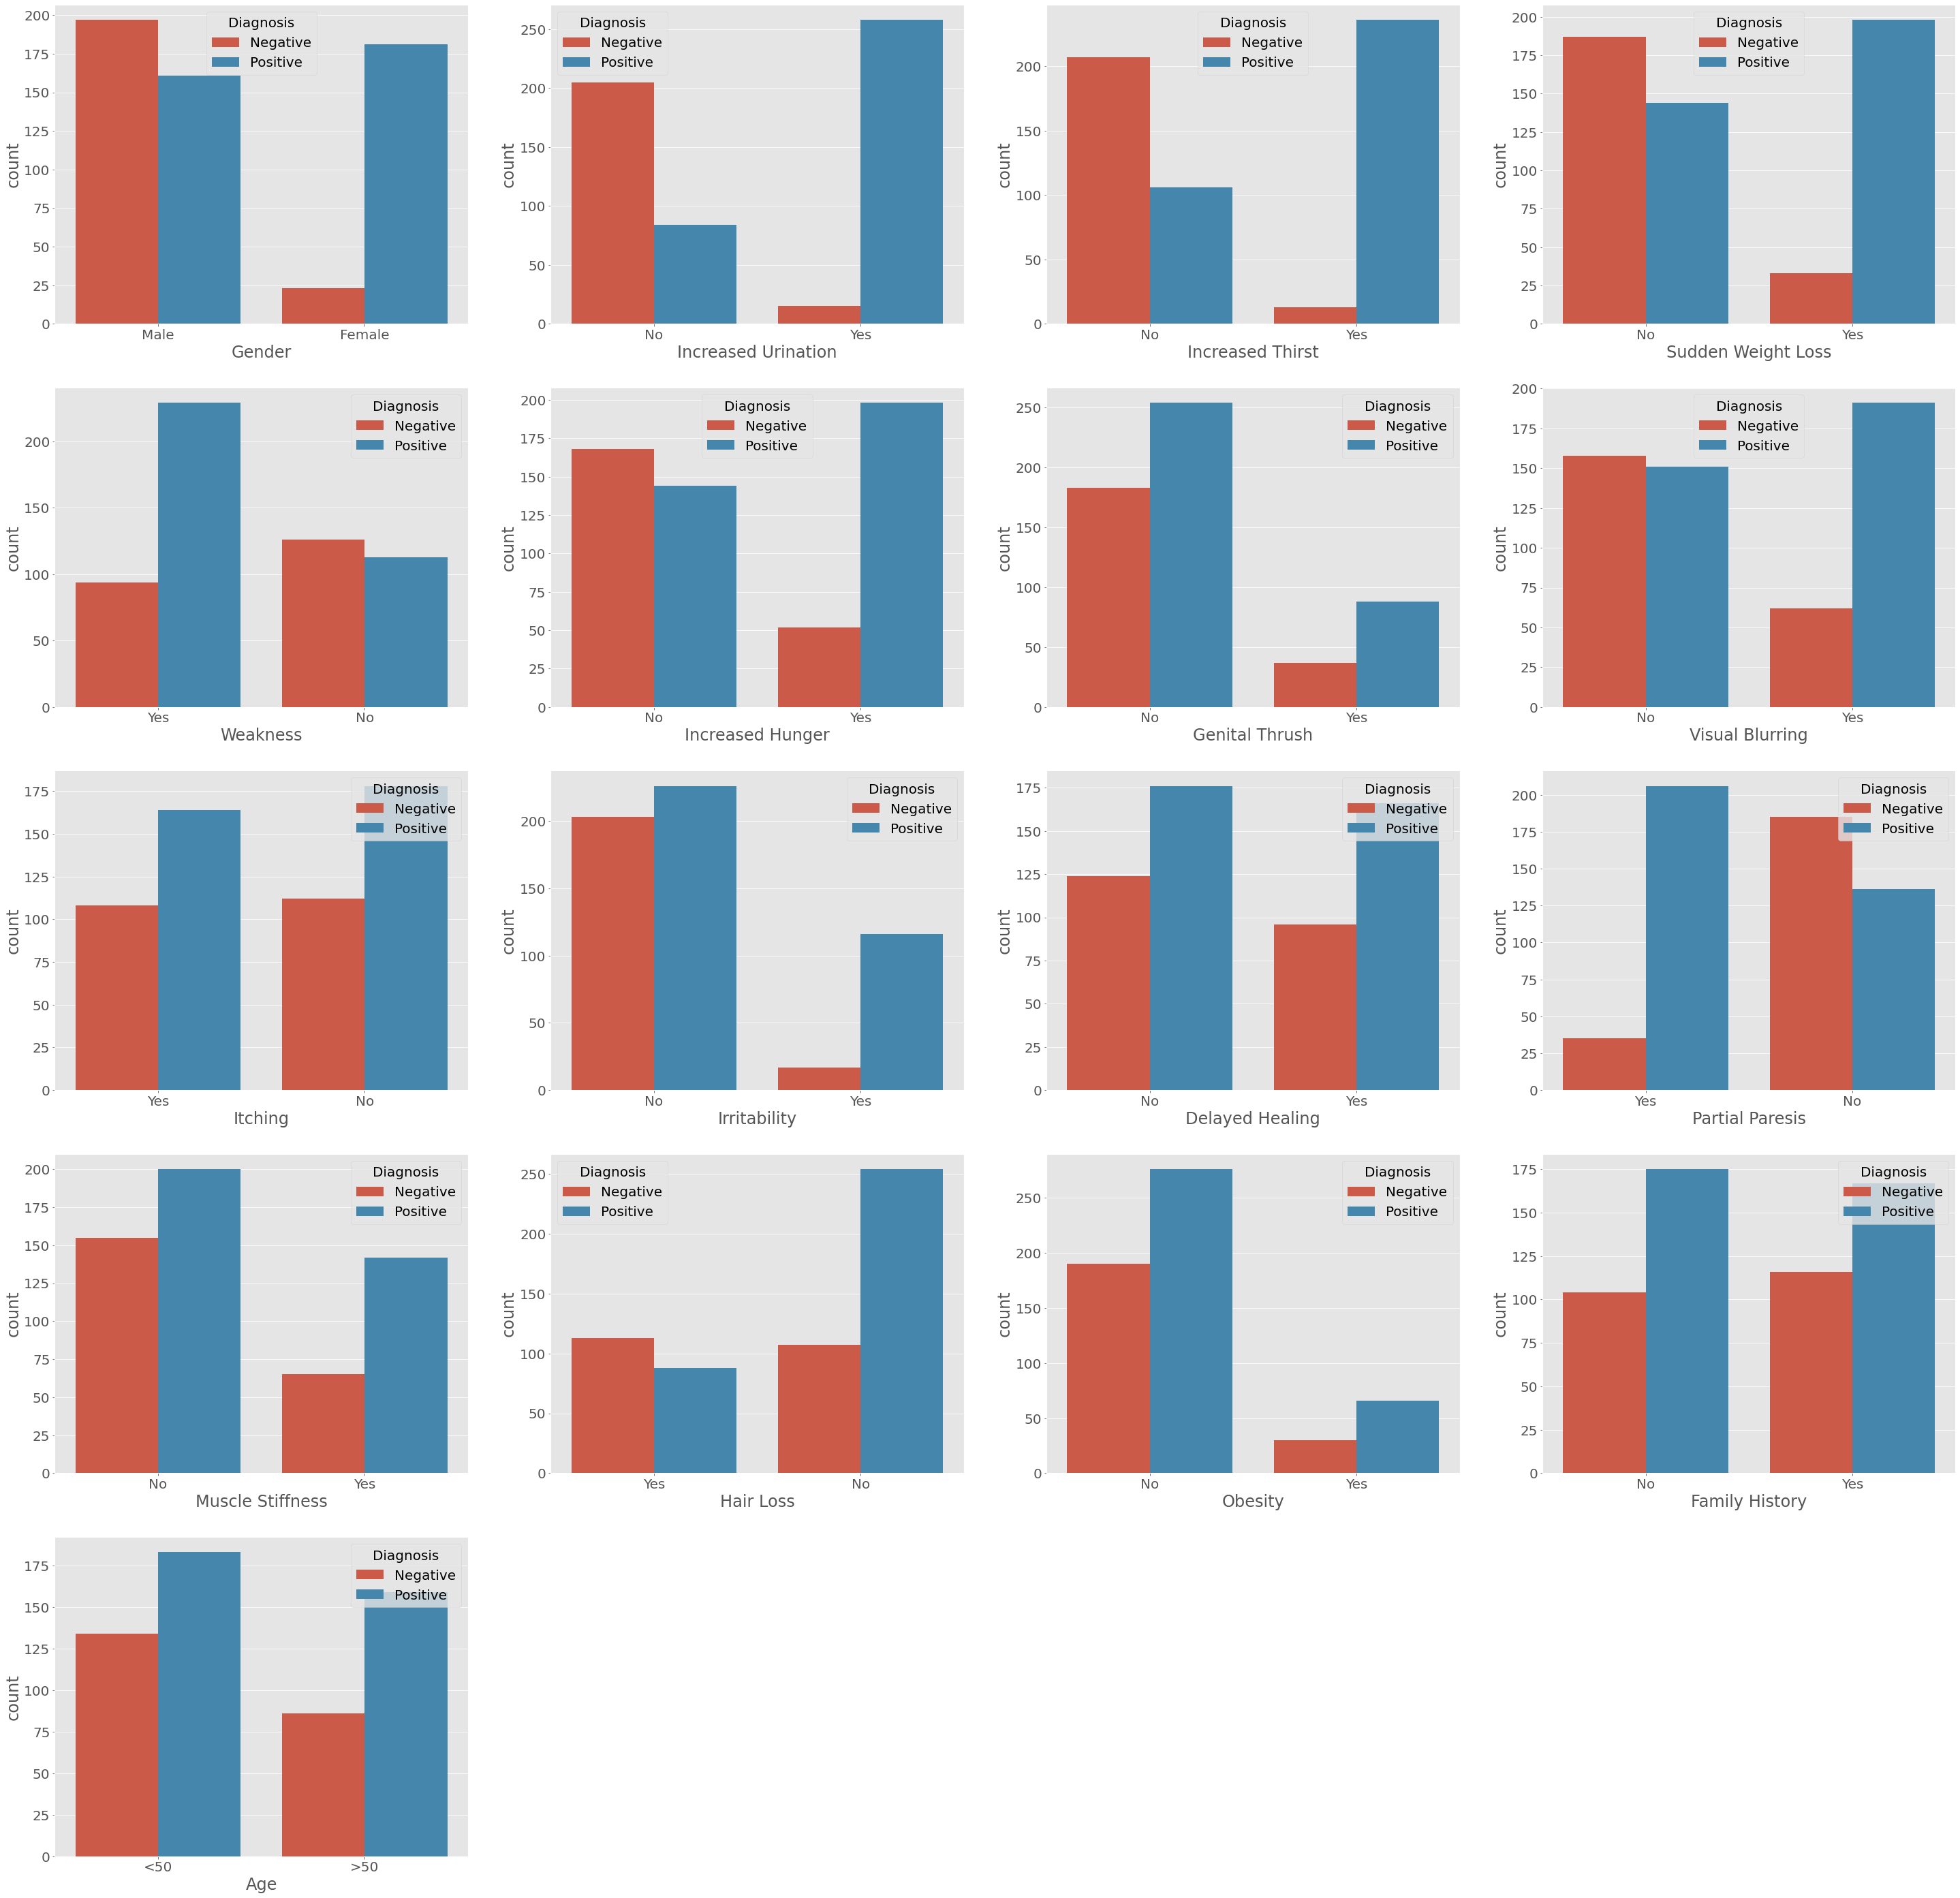

In [5]:
# Plots that show the relationship between the features and label.
temp_dataset=t1d_dataset.copy()
plt.rc('font',size=20)
fig, ax = plt.subplots(5,int((len(temp_dataset.columns)-1)/4),figsize=(50, 50))
i=0
ax = ax.ravel()

for feature in temp_dataset :
    if(feature!= 'Diagnosis' and feature!='Age'):
        sns.countplot(x=feature, hue="Diagnosis", data=original_val(temp_dataset),ax=ax[i])
        i=i+1
sns.countplot(x='Age', hue="Diagnosis", data=age_group(temp_dataset),ax=ax[i]) #specific treat for age feature 
fig.delaxes(ax[i+1])
fig.delaxes(ax[i+2])
fig.delaxes(ax[i+3])

plt.show()


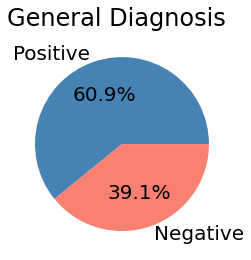

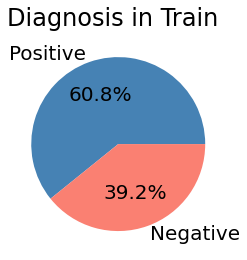

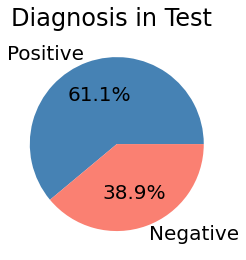

In [6]:
t1d_dataset["Diagnosis"].value_counts().plot.pie(labels=['Positive','Negative'], colors = ['steelblue', 'salmon'], autopct='%1.1f%%', title="General Diagnosis",subplots=True) 
plt.axes().set_ylabel('')
plt.show()
pd.DataFrame(Y_train).value_counts().plot.pie(labels=['Positive','Negative'], colors = ['steelblue', 'salmon'], autopct='%1.1f%%', title="Diagnosis in Train",subplots=True)
plt.axes().set_ylabel('')
plt.show()
pd.DataFrame(y_test).value_counts().plot.pie(labels=['Positive','Negative'], colors = ['steelblue', 'salmon'], autopct='%1.1f%%', title="Diagnosis in Test",subplots=True)
plt.axes().set_ylabel('')
plt.show()


We think it is important to show that the general distribution of the diagnosis among the full dataset,so we can know what results to expect.In addition, we think that it is important to show that the distribution is approxamitely the same after the split to train set and test set, so we can assume the data is balanced. 

**Q3d_1:**  Was there anything unexpected?
        
**Answer:** There were several unexpected issues among the data. First of all, this data includes quite alot of patients who suffers from T1D, much more than among the general population(9% of the total population).
The next thing that suprised us is that T1D is much more prevalent among female. As we learned in previous courses there is a linkage between T2D and the gender of a person because of the affect of Testosterone on those patients. Another thing that has suprised us is that this condition is much more common among people who has no hair loss. We could not find the medical connection between those two things.
Finally, what has suprised us the most is that T1D which is a congenital condition is distributed quite evenly among people who has familial history of this disease.

**Q3d_2:** Are there any features that you feel will be particularly important to your model? Explain why.

**Answer:** We think that the features in which there is a significant difference between the positive and negative diagnosis among the patients- those will be more significant for our model. Features such as "increased urination", "increased thirst", "increased hunger", "sudden weight loss","Partial Paresis","Visual Bluring". As we learned in previous courses , people who has this kind of condition may suffer from those symptoms, because of the high glucose levels in the blood.

# Question 4- Encode the data as onehot vector


In [7]:
#change the data into one hot vector
X_train=onehot(X_train)
Y_train=onehot(Y_train).ravel()
x_test=onehot(x_test)
y_test=onehot(y_test).ravel()

#scaling the age
X_train[:,0]=(X_train[:,0]-X_train[:,0].mean())/X_train[:,0].std()
x_test[:,0]=(x_test[:,0]-x_test[:,0].mean())/x_test[:,0].std()


# Question 5- Optimization and Choosing of Machine Learning Models


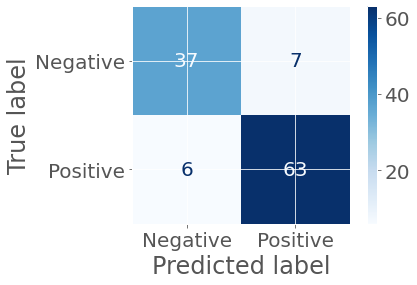

Loggistic regression: 
Sensitivity is 0.91. 
Specificity is 0.84. 
PPV is 0.90. 
NPV is 0.86. 
Accuracy is 0.88. 
F1 is 0.91. 
Loss is 3.97. 
AUROC is 0.956


In [8]:
# loggistic regression model
max_iter=2000
skf = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)

solver = 'liblinear'
log_reg = LogisticRegression(random_state=5, max_iter=max_iter,solver=solver)
lmbda = np.array([0.01, 0.1, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('logistic', log_reg)])
clf = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': ['l1','l2']},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=0, return_train_score=True)
clf.fit(X_train, Y_train)
best_log_reg=clf.best_estimator_

y_pred_test = best_log_reg.predict(x_test)
y_pred_proba_test = best_log_reg.predict_proba(x_test)

TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss=log_loss(y_test,y_pred_test)
plot_confusion_matrix(clf,x_test,y_test,cmap=plt.cm.Blues,display_labels=['Negative','Positive'])
plt.show()
print('Loggistic regression: \nSensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. \nLoss is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1,loss))

print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

Linear SVM: 
Sensitivity is 0.96. 
Specificity is 0.84. 
PPV is 0.90. 
NPV is 0.93. 
Accuracy is 0.91. 
F1 is 0.93. 
Loss is 0.18. 
AUROC is 0.960


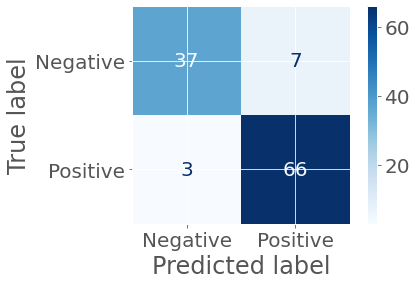

In [9]:
# Linear SVM model
svc = SVC(probability=True)
C = np.array([0.01, 0.1, 1, 10, 100, 1000])


pipe = Pipeline(steps=[('svm', svc)])
svm_lin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['linear']},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=0, return_train_score=True)
svm_lin.fit(X_train, Y_train)
best_svm_lin=svm_lin.best_estimator_

y_pred_test = best_svm_lin.predict(x_test)

y_pred_proba_test = best_svm_lin.predict_proba(x_test)

TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss=hinge_loss(np.where( y_test==0, -1, y_test),np.where(y_pred_test==0, -1, y_pred_test))  #calculating loss of svm with hinge_loss 
plot_confusion_matrix(svm_lin,x_test,y_test,cmap=plt.cm.Blues,display_labels=['Negative','Positive'])
print('Linear SVM: \nSensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. \nLoss is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1,loss))

print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))


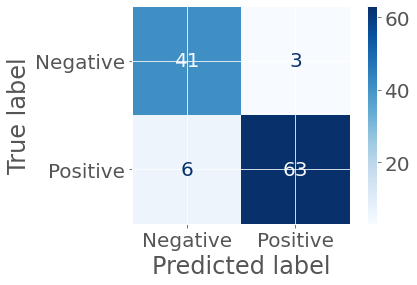

RBF: 
Sensitivity is 0.91. 
Specificity is 0.93. 
PPV is 0.95. 
NPV is 0.87. 
Accuracy is 0.92. 
F1 is 0.93. 
Loss is 0.16. 
AUROC is 0.983


In [10]:
# Non-linear svm model (RBF)
svc = SVC(probability=True)
C = np.array([0.01, 0.1, 1, 10, 100, 1000])

pipe = Pipeline(steps=[('svm', svc)])
svm_nonlin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['rbf'],'svm__gamma':['auto','scale']},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlin.fit(X_train, Y_train)
best_svm_nonlin=svm_nonlin.best_estimator_

y_pred_test = best_svm_nonlin.predict(x_test) 
y_pred_proba_test = best_svm_nonlin.predict_proba(x_test)

TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss=hinge_loss(np.where( y_test==0, -1, y_test),np.where(y_pred_test==0, -1, y_pred_test)) #calculating loss of svm with hinge_loss 
plot_confusion_matrix(svm_nonlin,x_test,y_test,cmap=plt.cm.Blues,display_labels=['Negative','Positive'])
plt.show()
print('RBF: \nSensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. \nLoss is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1,loss))
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))




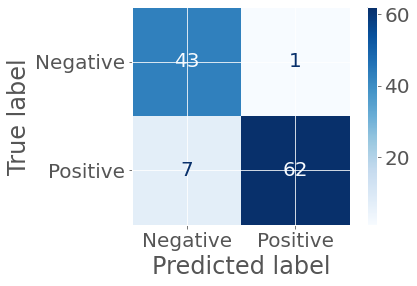

Poly: 
Sensitivity is 0.90. 
Specificity is 0.98. 
PPV is 0.98. 
NPV is 0.86. 
Accuracy is 0.93. 
F1 is 0.94. 
Loss is 0.14. 
AUROC is 0.985


In [11]:
# Non-linear svm model (POLY)
svm_nonlin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['poly'],'svm__gamma':['auto','scale']},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlin.fit(X_train, Y_train)
best_svm_nonlin=svm_nonlin.best_estimator_

y_pred_test = best_svm_nonlin.predict(x_test) 
y_pred_proba_test = best_svm_nonlin.predict_proba(x_test)

TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss=hinge_loss(np.where( y_test==0, -1, y_test),np.where(y_pred_test==0, -1, y_pred_test))  #calculating loss of svm with hinge_loss 
plot_confusion_matrix(svm_nonlin,x_test,y_test,cmap=plt.cm.Blues,display_labels=['Negative','Positive'])
plt.show()
print('Poly: \nSensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. \nLoss is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1,loss))
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))


**Q5c:**  What performs best on this dataset? Linear or non-linear models?
        
**Answer:** Generaly the SVM model performs better than the logistic regression model. As we can see the non-linear models perform better and have bigger AUROC values and lower loss values. Furthermore, the AUROC is not so differnt between RBF model and poly model. 
In our opinion, it is important to mention that our linear models show good results in general, so we can assume that the data is linearly separable. Although   that the non-linear models performes well, regarding our estimation about the data, it may suggest that those models are a bit overfitted. We assume that may happen because the data is not large enough and is not representing the population reliably.

# Question 6- Feature Selection

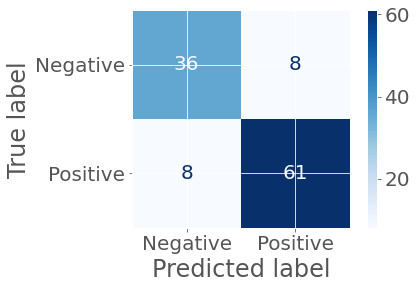

Random Forest: 
Sensitivity is 0.88. 
Specificity is 0.82. 
PPV is 0.88. 
NPV is 0.82. 
Accuracy is 0.86. 
F1 is 0.88.
AUROC is 0.936
Feature ranking:
1. feature Increased Urination (0.283558)
2. feature Increased Thirst (0.261896)
3. feature Sudden Weight Loss (0.126904)
4. feature Partial Paresis (0.104923)
5. feature Gender (0.067096)
6. feature Increased Hunger (0.033056)
7. feature Hair Loss (0.031888)
8. feature Irritability (0.023730)
9. feature Age (0.017857)
10. feature Visual Blurring (0.015611)
11. feature Weakness (0.011992)
12. feature Itching (0.005914)
13. feature Muscle Stiffness (0.005479)
14. feature Obesity (0.005419)
15. feature Delayed Healing (0.003906)
16. feature Genital Thrush (0.000481)
17. feature Family History (0.000290)


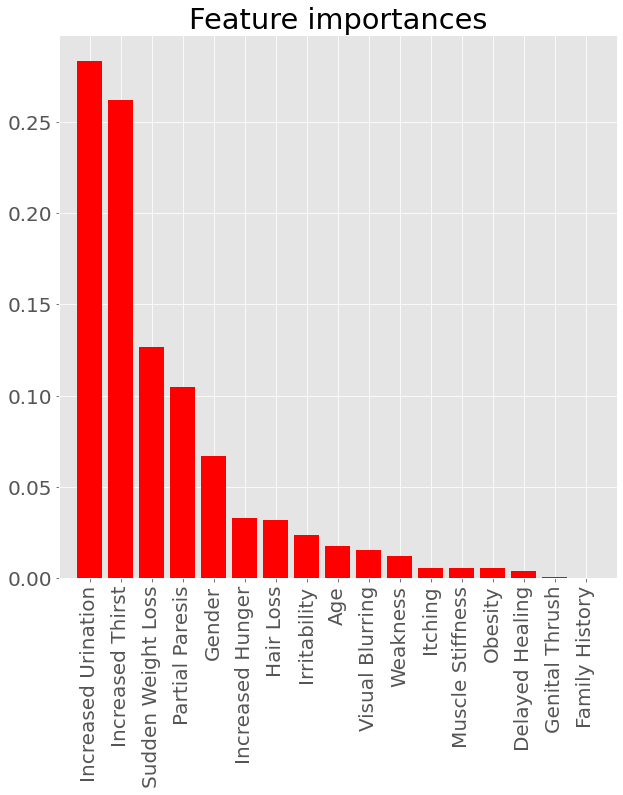

In [12]:
#Random Fores Model
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, Y_train)
y_pred_test = rfc.predict(x_test)
y_pred_proba_test = rfc.predict_proba(x_test)
TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
plot_confusion_matrix(rfc,x_test,y_test,cmap=plt.cm.Blues,display_labels=['Negative','Positive'])
plt.show()
print('Random Forest: \nSensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}.'.format(Se,Sp,PPV,NPV,Acc,F1))
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))


feature_data=t1d_dataset.copy()
feature_data.drop(labels='Diagnosis',axis=1,inplace=True)
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_data.columns[indices[f]] , importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
#t1d_dataset.columns[indices]
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],color="r", align="center")
plt.xticks(range(x.shape[1]), feature_data.columns[indices],rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()

**Q6a_1:** What are the 2 most important features according to the random forest?

**Answer:** As we can see, according to the histogram , the two most important features are **"increased urination"** and **"increased thirst"**.

**Q6a_2:** Does this match up exactly with the feature exploration you did?

**Answer:** Yes, it is match up with our feature exploration. Moreover, as we learned in previous courses those symptoms are highly connected to type 1 diabetus. Those symptoms may appear beacause the body try to get rid off the high glucose level in the blood.

# Question 7- Data separability visualiztion

**it is importonat to mention that the PCA method doesn't work properly on the first run. It should run twice to get appropriate results.**

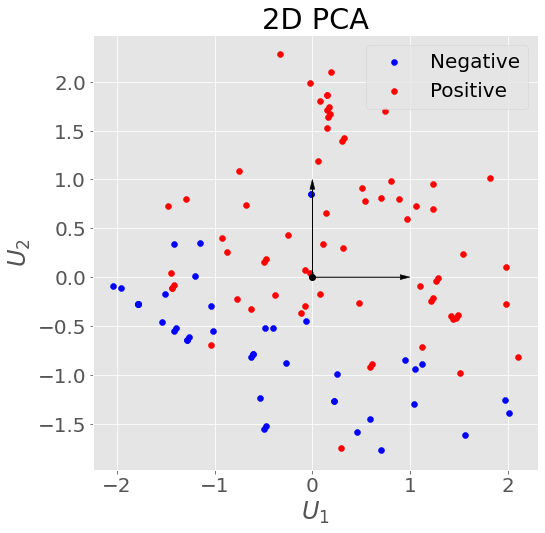

In [14]:

#centering the data before using PCA
x_train_centered = X_train - X_train.mean(axis=0, keepdims=True)
x_test_centered = x_test - x_test.mean(axis=0, keepdims=True)

#pre-processing - applying PCA 
pca=PCA(n_components=2,whiten=True)
x_train_pca=pca.fit_transform(x_train_centered,Y_train)
x_test_pca=pca.transform(x_test_centered)

plt_2d_pca(x_test_pca,y_test)

**Q7_b:**  How separable is your data when reduced to just two features?

**Answer:** As we can see, the data is linearly seperable. Although, there are some observations that will be missclassified with linear model. It might affect the scores of the model.




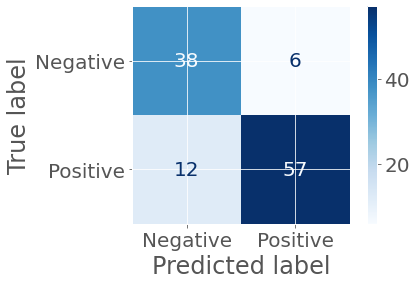

Loggistic regression: 
Sensitivity is 0.83. 
Specificity is 0.86. 
PPV is 0.90. 
NPV is 0.76. 
Accuracy is 0.84. 
F1 is 0.86. 
Loss is 5.50. 
AUROC is 0.916


In [15]:
#  loggistic regression model
solver = 'liblinear'
log_reg = LogisticRegression(random_state=5, max_iter=max_iter,solver=solver)
lmbda = np.array([0.01, 0.1, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('logistic', log_reg)])
clf1 = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': ['l1','l2']},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=0, return_train_score=True)
clf1.fit(x_train_pca, Y_train)
best_log_reg=clf1.best_estimator_

y_pred_test = best_log_reg.predict(x_test_pca) 
y_pred_proba_test = best_log_reg.predict_proba(x_test_pca)

TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss=log_loss(y_test,y_pred_test)
plot_confusion_matrix(clf1,x_test_pca,y_test,cmap=plt.cm.Blues,display_labels=['Negative','Positive'])
plt.show()
print('Loggistic regression: \nSensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. \nLoss is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1,loss))

print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))




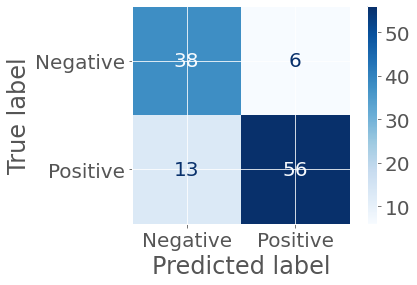

Linear SVM: 
Sensitivity is 0.81. 
Specificity is 0.86. 
PPV is 0.90. 
NPV is 0.75. 
Accuracy is 0.83. 
F1 is 0.85. 
Loss is 0.34. 
AUROC is 0.914


In [16]:
#  SVM linear model

svc = SVC(probability=True)
C = np.array([0.01, 0.1, 1, 10, 100, 1000])

pipe = Pipeline(steps=[('svm', svc)])
svm_lin1 = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['linear']},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=0, return_train_score=True)
svm_lin1.fit(x_train_pca, Y_train)
best_svm_lin=svm_lin1.best_estimator_

y_pred_test = best_svm_lin.predict(x_test_pca)
y_pred_proba_test = best_svm_lin.predict_proba(x_test_pca)

TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss=hinge_loss(np.where( y_test==0, -1, y_test),np.where(y_pred_test==0, -1, y_pred_test)) #calculating loss of svm with hinge_loss 
plot_confusion_matrix(svm_lin1,x_test_pca,y_test,cmap=plt.cm.Blues,display_labels=['Negative','Positive'])
plt.show()
print('Linear SVM: \nSensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. \nLoss is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1,loss))

print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))



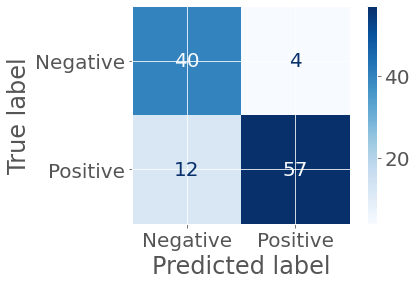

RBF: 
Sensitivity is 0.83. 
Specificity is 0.91. 
PPV is 0.93. 
NPV is 0.77. 
Accuracy is 0.86. 
F1 is 0.88. 
Loss is 0.28. 
AUROC is 0.907


In [17]:
#  SVM non-linear model (RBF)
pipe = Pipeline(steps=[('svm', svc)])
svm_nonlin1 = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['rbf'],'svm__gamma':['auto','scale']},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlin1.fit(x_train_pca, Y_train)
best_svm_nonlin=svm_nonlin1.best_estimator_

y_pred_test = best_svm_nonlin.predict(x_test_pca) 
y_pred_proba_test = best_svm_nonlin.predict_proba(x_test_pca)

TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss=hinge_loss(np.where( y_test==0, -1, y_test),np.where(y_pred_test==0, -1, y_pred_test)) #calculating loss of svm with hinge_loss 
plot_confusion_matrix(svm_nonlin1,x_test_pca,y_test,cmap=plt.cm.Blues,display_labels=['Negative','Positive'])
plt.show()
print('RBF: \nSensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. \nLoss is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1,loss))
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

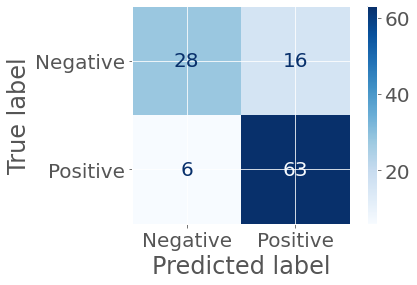

Poly: 
Sensitivity is 0.91. 
Specificity is 0.64. 
PPV is 0.80. 
NPV is 0.82. 
Accuracy is 0.81. 
F1 is 0.85. 
Loss is 0.39. 
AUROC is 0.926


In [18]:
#  SVM non-linear model(POLY)
svm_nonlin1 = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['poly'],'svm__gamma':['auto','scale']},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlin1.fit(x_train_pca, Y_train)
best_svm_nonlin=svm_nonlin1.best_estimator_

y_pred_test = best_svm_nonlin.predict(x_test_pca) 
y_pred_proba_test = best_svm_nonlin.predict_proba(x_test_pca)

TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss=hinge_loss(np.where( y_test==0, -1, y_test),np.where(y_pred_test==0, -1, y_pred_test)) #calculating loss of svm with hinge_loss 
plot_confusion_matrix(svm_nonlin1,x_test_pca,y_test,cmap=plt.cm.Blues,display_labels=['Negative','Positive'])
plt.show()
print('Poly: \nSensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. \nLoss is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1,loss))
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

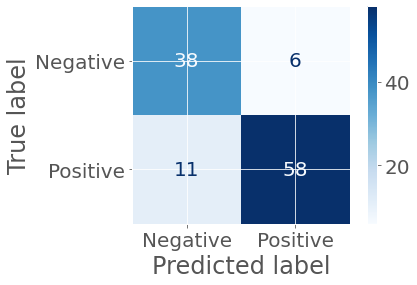

Random Forest: 
Sensitivity is 0.84. 
Specificity is 0.86. 
PPV is 0.91. 
NPV is 0.78. 
Accuracy is 0.85. 
F1 is 0.87. 
AUROC is 0.911


In [19]:
# Random Forest model
rfc1 = RandomForestClassifier(max_depth=2, random_state=0)
rfc1.fit(x_train_pca, Y_train)
y_pred_test = rfc1.predict(x_test_pca) 
y_pred_proba_test = rfc1.predict_proba(x_test_pca)
TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
plot_confusion_matrix(rfc1,x_test_pca,y_test,cmap=plt.cm.Blues,display_labels=['Negative','Positive'])
plt.show()

print('Random Forest: \nSensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1))
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

In [20]:
# Extracting the 2 most important features

x_sig_train = X_train[:, 2:4]
x_sig_test = x_test[:,2:4]

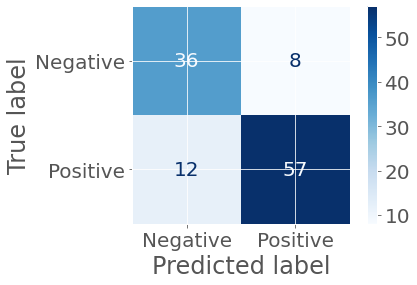

Loggistic regression: 
Sensitivity is 0.83. 
Specificity is 0.82. 
PPV is 0.88. 
NPV is 0.75. 
Accuracy is 0.82. 
F1 is 0.85. 
Loss is 6.11. 
AUROC is 0.881


In [21]:
solver = 'liblinear'
log_reg = LogisticRegression(random_state=5, max_iter=max_iter,solver=solver)
lmbda = np.array([0.01, 0.01, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('scale', StandardScaler()),('logistic', log_reg)])
clf = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': ['l1','l2']},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=0, return_train_score=True)
clf.fit(x_sig_train, Y_train)
best_log_reg=clf.best_estimator_

y_pred_test = best_log_reg.predict(x_sig_test) 
y_pred_proba_test = best_log_reg.predict_proba(x_sig_test)

TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss=log_loss(y_test,y_pred_test)
plot_confusion_matrix(clf,x_sig_test,y_test,cmap=plt.cm.Blues,display_labels=['Negative','Positive'])
plt.show()
print('Loggistic regression: \nSensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. \nLoss is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1,loss))

print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

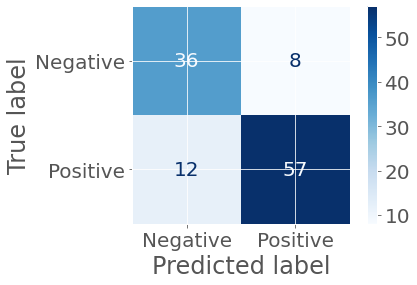

Linear SVM: 
Sensitivity is 0.83. 
Specificity is 0.82. 
PPV is 0.88. 
NPV is 0.75. 
Accuracy is 0.82. 
F1 is 0.85. 
Loss is 0.35. 
AUROC is 0.881


In [22]:
svc = SVC(probability=True)
C = np.array([0.01, 0.1, 1, 10, 100, 1000])


pipe = Pipeline(steps=[('svm', svc)])
svm_lin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['linear']},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=0, return_train_score=True)
svm_lin.fit(x_sig_train, Y_train)
best_svm_lin=svm_lin.best_estimator_

y_pred_test = best_svm_lin.predict(x_sig_test) 
y_pred_proba_test = best_svm_lin.predict_proba(x_sig_test)

TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss=hinge_loss(np.where( y_test==0, -1, y_test),np.where(y_pred_test==0, -1, y_pred_test)) #calculating loss of svm with hinge_loss 
plot_confusion_matrix(svm_lin,x_sig_test,y_test,cmap=plt.cm.Blues,display_labels=['Negative','Positive'])
plt.show()
print('Linear SVM: \nSensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. \nLoss is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1,loss))

print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))


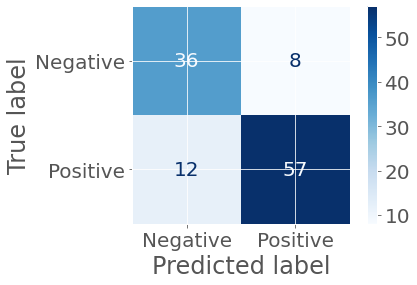

RBF: 
Sensitivity is 0.83. 
Specificity is 0.82. 
PPV is 0.88. 
NPV is 0.75. 
Accuracy is 0.82. 
F1 is 0.85. 
Loss is 0.35. 
AUROC is 0.871


In [23]:
svc = SVC(probability=True)
C = np.array([0.01, 0.1, 1, 10, 100, 1000])

pipe = Pipeline(steps=[('svm', svc)])
svm_nonlin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['rbf'],'svm__gamma':['auto','scale']},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlin.fit(x_sig_train, Y_train)
best_svm_nonlin=svm_nonlin.best_estimator_

y_pred_test = best_svm_nonlin.predict(x_sig_test) 
y_pred_proba_test = best_svm_nonlin.predict_proba(x_sig_test)

TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss=hinge_loss(np.where( y_test==0, -1, y_test),np.where(y_pred_test==0, -1, y_pred_test)) #calculating loss of svm with hinge_loss 
plot_confusion_matrix(svm_nonlin,x_sig_test,y_test,cmap=plt.cm.Blues,display_labels=['Negative','Positive'])
plt.show()
print('RBF: \nSensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. \nLoss is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1,loss))
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))


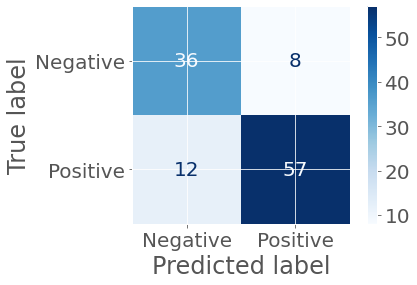

Poly: 
Sensitivity is 0.83. 
Specificity is 0.82. 
PPV is 0.88. 
NPV is 0.75. 
Accuracy is 0.82. 
F1 is 0.85. 
Loss is 0.35. 
AUROC is 0.871


In [24]:
svm_nonlin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['poly'],'svm__gamma':['auto','scale']},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlin.fit(x_sig_train, Y_train)
best_svm_nonlin=svm_nonlin.best_estimator_

y_pred_test = best_svm_nonlin.predict(x_sig_test) 
y_pred_proba_test = best_svm_nonlin.predict_proba(x_sig_test)

TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss=hinge_loss(np.where( y_test==0, -1, y_test),np.where(y_pred_test==0, -1, y_pred_test)) #calculating loss of svm with hinge_loss 
plot_confusion_matrix(svm_nonlin,x_sig_test,y_test,cmap=plt.cm.Blues,display_labels=['Negative','Positive'])
plt.show()
print('Poly: \nSensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. \nLoss is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1,loss))
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))


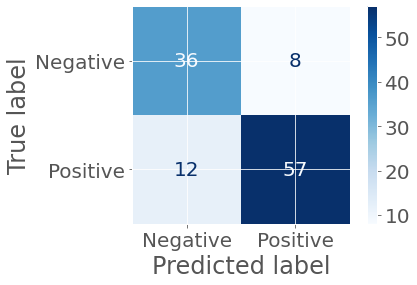

Random Forest: 
Sensitivity is 0.83. 
Specificity is 0.82. 
PPV is 0.88. 
NPV is 0.75. 
Accuracy is 0.82. 
F1 is 0.85. 
AUROC is 0.881


In [25]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(x_sig_train, Y_train)
y_pred_test = rfc.predict(x_sig_test)
y_pred_proba_test = rfc.predict_proba(x_sig_test)
TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
plot_confusion_matrix(rfc,x_sig_test,y_test,cmap=plt.cm.Blues,display_labels=['Negative','Positive'])
plt.show()
print('Random Forest: \nSensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1))
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))


**Q7_e:**  What performs better? 2 features of the reduced dimensionality.

**Answer:** As we can see, the scores are better for the reduced dimentionality (PCA) for all models. Furthemore, the scores of 2-features pretty good' considering the low computational cost. That is because, as we showed in feature selection section, there is good correlation between those features and the
diagnosis, and they contain a pretty big percentage of the information. On the other hand, the PCA model creates axis that consist of linear combination of all the 
features and thus include more information. However in huge databases with great number of features and examples it might be more complicated in the computaional manner. In addition, the 2 feature model is pretty easy method to apply, and get good estimation of the prediction.